In [32]:
import numpy as np
import matplotlib.pyplot as plt
import sdeint
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


a = 1.0
b = 0.8
tspan = np.linspace(0.0, 5.0, 5001)
x0 = 0.1

def f(x, t):
    return -(a + x*b**2)*(1 - x**2)

def g(x, t):
    return b*(1 - x**2)

result = sdeint.itoint(f, g, x0, tspan)

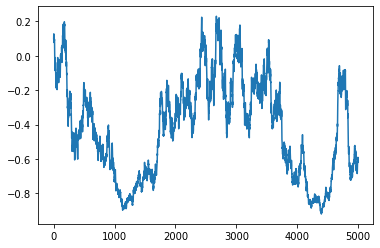

In [33]:
plt.plot(result)

In [34]:
xvals=np.arange(0,result.shape[0])
yvals=result

score=0

preds=[]

n_points=100
for j in np.arange(0,n_points+1):
    preds.append(yvals[j])

In [35]:
import warnings
from sklearn.linear_model import LinearRegression


warnings.filterwarnings("ignore")


for i in np.arange(n_points,np.array(result).shape[0],1):

        
    x_pairs=[]
    y_pairs=[]
    
    for j in range(0,n_points):
        x_pairs.append(xvals[i-j])
        y_pairs.append(yvals[i-j])
    
    x_pairs=np.array(x_pairs).reshape(-1,1)
    y_pairs=np.array(y_pairs).reshape(-1,1)
    
    if i<np.array(result).shape[0]-1:
        
        regression=LinearRegression().fit(x_pairs, y_pairs)

        
        
        pred=regression.predict(np.array([xvals[i+1]]).reshape(-1,1))
        
        preds.append(pred)

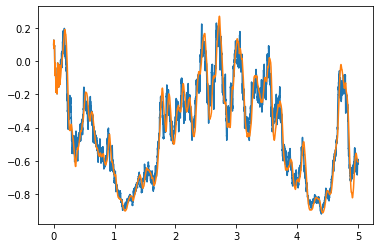

In [36]:
plt.plot(tspan,result)
plt.plot(tspan,preds)